3x − cos x − 1 = 0


cos x + y = 1.5;
2x − sin(y − 0.5) = 1

In [2]:
import pandas as pd
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

x,y = symbols('x, y')


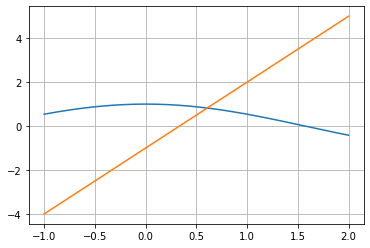

In [31]:
#локализация корней
x1 = np.linspace( -1,2, 1000)
y1 = np.cos(x1)
y2 = 3*x1 - 1
fig, ax = plt.subplots()

ax.plot(x1, y1)
ax.plot(x1,y2)

ax.grid(axis = 'both')

plt.show()


In [32]:
F = 3*x - cos(x) - 1 # исходное уравнение
dF = diff(F,x) # дифференцирование исходного уравнения
x0 = 0.5 # начальное приближение
x01 = 0
# реализация итеративной последовательности метода Ньютона
while abs(x0 - x01) > 0.0001:
    x01 = x0
    x0 = x0 - float(F.subs(x,x0)/dF.subs(x,x0))
x0

0.6071016481031287

In [33]:
nsolve(3*x - cos(x) - 1,x,1)

0.607101648103123

In [34]:
dF

sin(x) + 3

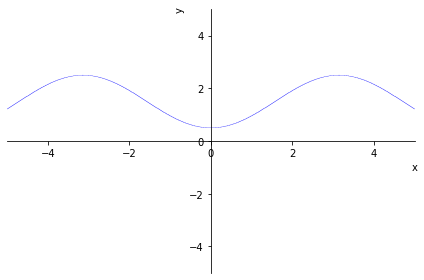

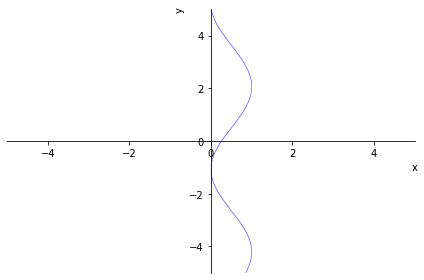

AttributeError: 'Plot' object has no attribute 'grid'

In [35]:
z1 = plot_implicit(Eq(cos(x) + y,1.5))
z2 = plot_implicit(Eq(2*x - sin(y - 0.5) ,1))
z1.append(z2[0])
z1.grid()

In [ ]:
F

In [36]:
J

[[-sin(x), 1], [2, -cos(y - 0.5)]]

In [37]:
def norma(b):
    n = b.shape[0]
    if n == 1:
        b = np.transpose(b)
        n = b.shape[0]
    s = 0
    for j in range(n):
            s += (b[j])**2
    return np.sqrt(s)

In [38]:
#метод наискорейшего градиентного спуска
def steep(A,b):
    n = 0
    n = A.shape[0]
    x = np.zeros((n,1)) #начальное приближение
    # поиск вектора невязки
    r = A*x - b
    eps = 10**(-9)
    while norma(r)[0,0] > eps:
        n+=1
        a = A*r
        # вычисление длины шага
        lam = (1/2)*(np.transpose(r)*r)/(np.transpose(a)*r)
        x = x - lam[0,0]*r
        r = A*x - b
    return x[:,0]

In [39]:
# проверяем, есть ли на главной диагонали нули
def no0(M, k):
    n =  M.shape[0]
    while k < n and not M[k, k]:
        k += 1
    return k

In [40]:
def Gauss(A,b):
        M = np.hstack((A, b)) # "склейка" матрицы коэффициентов при переменных и вектора свободных членов
        n = M.shape[0] 
        for k in range(n): 
            # убираем нули с главной диагонали, если они есть
            k0 = no0(M, k)
            if k0 != k:
                M[k0], M[k] = M[k].copy(), M[k0]   
            if M[k, k] != 1:
                M[k, :] *= 1 / M[k, k]
            # приямой ход метода Гаусса
            for r in range(k + 1, n):
                M[r, :] -= M[k, :] * M[r, k]
        #обратный ход метода Гаусса
        for k in range(n - 1, 0, -1):
            for r in range(k - 1, -1, -1):
                if M[r, k]:
                    M[r, :] -= M[k, :] * M[r, k]
        if b.shape[1] > 1:
            return np.hsplit(M,2)[1]
        return  (M[:,n])

In [41]:
# метод отражений
def mir(A, b):
    n = A.shape[0]
    for i in range(n-1):
        #генерирование вектора единичной длины - w
        z = np.eye(n)[i,i:n]
        y = np.transpose(A[i:n,i])
        a = norma(y)/norma(z) 
        w = (y - a*z)/norma(y - a*z)
        #генерирование матрицы отражений - U
        U = np.eye(n-i,n-i) - 2*np.transpose(w)*w
        U = np.block([[np.eye(n,n)[0:i,:]],[np.zeros((n-i,i)), U]])
        A = U*A
        b = U*b
    M = np.hstack((A, b)) # обратный ход метода Гаусса
    for i in range(n):
        for j in range(n):
            if abs(M[i,j]) < 10**(-10):
                M[i,j] = 0
        if M[i, i] != 1:
            M[i, :] *= 1 / M[i, i]
    for k in range(n - 1, 0, -1):
           for r in range(k - 1, -1, -1):
                if M[r, k]:
                    M[r, :] -= M[k, :] * M[r, k]
    return  (M[:,n])

In [42]:
# исходная система
F = [cos(x) + y -1.5,2*x - sin(y - 0.5) - 1]
# дифференцирование системы
J = [[diff(F[0],x),diff(F[0],y)],[diff(F[1],x),diff(F[1],y)]]
# функция для постановки числовых значений в функцию
def sol(f,x01):
    return float(f.subs([(x,x01[0]),(y,x01[1])]))
# вычисление значений в левой части СЛАУ
def A(x01): 
    return np.matrix([[sol(J[0][0],x01),sol(J[0][1],x01)],[sol(J[1][0],x01),sol(J[1][1],x01)]])
# вычисление значений в правой части СЛАУ
def F1(x01):
    return np.matrix([[-1*sol(F[0],x01)],[-1*sol(F[1],x01)]])
x01 = np.array([1.0000, 1.0000]) # начальное приближение
x0 = np.array([0.0000,0.0000])
while norma(x01 - x0) > 0.0001:
    x0 = x01
    B = steep(A(x01),F1(x01))
    x0 = np.array([x01[0],x01[1]])
    x01[0] +=B[0]
    x01[1] +=B[1]
x01

array([0.58192615, 0.66459448])

In [53]:

nsolve([cos(x) + y -1.5,2*x - sin(y - 0.5) - 1],[x,y],[1,1])

Matrix([
[0.581926151754701],
[0.664594478362647]])

In [15]:
x1 = 1.
x2 = 3.
def f(x):
    return 4*np.sin(x)+1-x
while abs(x1-x2) > 0.0001:
    x0 = x2
    x2 = x2 - f(x2)*(x2-x1)/(f(x2)-f(x1))
    x1 = x0
print(x2)

2.702061372510227
